In [1]:
import findspark
findspark.init('/home/ubuntu/spark-2.1.1-bin-hadoop2.7')
import pyspark
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('operations').getOrCreate()


df = spark.read.csv('weatherAUS.csv', inferSchema=True, header=True)

In [2]:
#2.2
df.columns

['Date',
 'Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RISK_MM',
 'RainTomorrow']

In [3]:
print(len(df.columns),df.count())

24 3011


In [4]:
df.printSchema()


root
 |-- Date: string (nullable = true)
 |-- Location: string (nullable = true)
 |-- MinTemp: double (nullable = true)
 |-- MaxTemp: double (nullable = true)
 |-- Rainfall: double (nullable = true)
 |-- Evaporation: string (nullable = true)
 |-- Sunshine: string (nullable = true)
 |-- WindGustDir: string (nullable = true)
 |-- WindGustSpeed: integer (nullable = true)
 |-- WindDir9am: string (nullable = true)
 |-- WindDir3pm: string (nullable = true)
 |-- WindSpeed9am: integer (nullable = true)
 |-- WindSpeed3pm: integer (nullable = true)
 |-- Humidity9am: integer (nullable = true)
 |-- Humidity3pm: integer (nullable = true)
 |-- Pressure9am: double (nullable = true)
 |-- Pressure3pm: double (nullable = true)
 |-- Cloud9am: integer (nullable = true)
 |-- Cloud3pm: integer (nullable = true)
 |-- Temp9am: double (nullable = true)
 |-- Temp3pm: double (nullable = true)
 |-- RainToday: string (nullable = true)
 |-- RISK_MM: double (nullable = true)
 |-- RainTomorrow: integer (nullable = tr

In [5]:
#2.3
df.describe().show()


+-------+---------+--------+-----------------+------------------+-----------------+-----------+--------+-----------+-----------------+----------+----------+-----------------+------------------+------------------+------------------+------------------+-----------------+------------------+------------------+------------------+------------------+---------+------------------+-------------------+
|summary|     Date|Location|          MinTemp|           MaxTemp|         Rainfall|Evaporation|Sunshine|WindGustDir|    WindGustSpeed|WindDir9am|WindDir3pm|     WindSpeed9am|      WindSpeed3pm|       Humidity9am|       Humidity3pm|       Pressure9am|      Pressure3pm|          Cloud9am|          Cloud3pm|           Temp9am|           Temp3pm|RainToday|           RISK_MM|       RainTomorrow|
+-------+---------+--------+-----------------+------------------+-----------------+-----------+--------+-----------+-----------------+----------+----------+-----------------+------------------+------------------+

In [6]:
df.crosstab('MinTemp', 'RainTomorrow').show()
df.crosstab('MaxTemp', 'RainTomorrow').show()
df.crosstab('RISK_MM', 'RainTomorrow').show()
df.crosstab('Rainfall', 'RainTomorrow').show()


+--------------------+---+---+
|MinTemp_RainTomorrow|  0|  1|
+--------------------+---+---+
|                21.2|  2|  0|
|                20.4|  7|  2|
|                null|  4|  2|
|                 0.0|  7|  1|
|                18.8|  8|  3|
|                 9.1| 17|  3|
|                10.2| 14|  3|
|                16.7| 18|  1|
|                15.3|  9|  1|
|                 9.4| 11|  1|
|                 3.9|  4|  2|
|                 5.0| 15|  6|
|                18.1|  8|  5|
|                10.0| 25|  5|
|                 7.8|  8|  5|
|                13.7|  9|  0|
|                 4.7| 15|  6|
|                 7.6| 13|  3|
|                18.2|  4|  1|
|                 7.4| 14|  5|
+--------------------+---+---+
only showing top 20 rows

+--------------------+---+---+
|MaxTemp_RainTomorrow|  0|  1|
+--------------------+---+---+
|                31.6| 10|  0|
|                21.2|  4|  0|
|                25.9| 13|  1|
|                37.1|  4|  0|
|            

In [7]:

pre9=df.rdd.map(lambda x:x[15]).collect()
import matplotlib.pyplot as plt
plt.hist(pre9, bins=20, color='lightblue')
plt.show()

miT=df.rdd.map(lambda x:x[2]).collect()
maT=df.rdd.map(lambda x:x[3]).collect()
plt.plot(miT, color = "#DC143C", label = 'Minimum Temperature')
plt.plot(maT, color = "#104E8B", label = 'Maximum Temperature')
plt.legend()
plt.show()



<Figure size 640x480 with 1 Axes>

<Figure size 640x480 with 1 Axes>

In [8]:
#2.4
import pyspark.sql.functions as pyfunc
from functools import reduce
df_agg_col = reduce(
    lambda a, b: a.union(b),
    (
        df.agg(
            pyfunc.count(pyfunc.when(pyfunc.isnull(c), c)).alias('NULL_Count')
        ).select(pyfunc.lit(c).alias("Column_Name"), "NULL_Count")
        for c in df.columns
    )
)




In [9]:
df_agg_col.show(len(df.columns))

+-------------+----------+
|  Column_Name|NULL_Count|
+-------------+----------+
|         Date|         0|
|     Location|         0|
|      MinTemp|         6|
|      MaxTemp|         1|
|     Rainfall|        20|
|  Evaporation|      3011|
|     Sunshine|      3011|
|  WindGustDir|        10|
|WindGustSpeed|        10|
|   WindDir9am|       517|
|   WindDir3pm|        42|
| WindSpeed9am|         4|
| WindSpeed3pm|         7|
|  Humidity9am|         4|
|  Humidity3pm|         4|
|  Pressure9am|         0|
|  Pressure3pm|         4|
|     Cloud9am|      1729|
|     Cloud3pm|      1596|
|      Temp9am|         4|
|      Temp3pm|         4|
|    RainToday|        20|
|      RISK_MM|         0|
| RainTomorrow|         0|
+-------------+----------+



In [10]:
'''
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.preprocessing import Imputer

df_pd=df.toPandas(df)
wdf=weatherAul.drop(["Location","Date","Evaporation","Sunshine","Cloud9am","Cloud3pm"],axis=1)
wdf=wdf.dropna(axis=0)
kmeans_model = KMeans(n_clusters=4,random_state=1)
good_columns=wdf._get_numeric_data()
kmeans_model.fit(good_columns)
labels=kmeans_model.labels_
'''

'\nfrom sklearn.cluster import KMeans\nfrom sklearn.decomposition import PCA\nfrom sklearn.preprocessing import Imputer\n\ndf_pd=df.toPandas(df)\nwdf=weatherAul.drop(["Location","Date","Evaporation","Sunshine","Cloud9am","Cloud3pm"],axis=1)\nwdf=wdf.dropna(axis=0)\nkmeans_model = KMeans(n_clusters=4,random_state=1)\ngood_columns=wdf._get_numeric_data()\nkmeans_model.fit(good_columns)\nlabels=kmeans_model.labels_\n'

In [11]:
from pyspark.ml.clustering import KMeans
kmeans_model = KMeans(k=4,seed=1)




In [ ]:
df.columns
#2.3
df.describe().show()
df.printSchema()
print(len(df.columns),df.count())

df.crosstab('MinTemp', 'RainTomorrow').show()
df.crosstab('MaxTemp', 'RainTomorrow').show()
df.crosstab('RISK_MM', 'RainTomorrow').show()
df.crosstab('Rainfall', 'RainTomorrow').show()


pre9=df.rdd.map(lambda x:x[15]).collect()
import matplotlib.pyplot as plt
plt.hist(pre9, bins=20, color='lightblue')
plt.show()

miT=df.rdd.map(lambda x:x[2]).collect()
maT=df.rdd.map(lambda x:x[3]).collect()
plt.plot(miT, color = "#DC143C", label = 'Minimum Temperature')
plt.plot(maT, color = "#104E8B", label = 'Maximum Temperature')
plt.legend()
plt.show()

#2.4
import pyspark.sql.functions as pyfunc
from functools import reduce
df_agg_col = reduce(
    lambda a, b: a.union(b),
    (
        df.agg(
            pyfunc.count(pyfunc.when(pyfunc.isnull(c), c)).alias('NULL_Count')
        ).select(pyfunc.lit(c).alias("Column_Name"), "NULL_Count")
        for c in df.columns
    )
)

df_agg_col.show(len(df.columns))




In [12]:
#3.1
need_to_drop=["Date","Location","Evaporation","Sunshine","RISK_MM"]
df_drop1=df.drop(*need_to_drop)
df_drop1.columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday',
 'RainTomorrow']

In [13]:

#3.2
df_agg_col2 = reduce(
    lambda a, b: a.union(b),
    (
        df_drop1.agg(
            pyfunc.count(pyfunc.when(pyfunc.isnull(c), c)).alias('NULL_Count')
        ).select(pyfunc.lit(c).alias("Column_Name"), "NULL_Count")
        for c in df_drop1.columns
    )
)
df_agg_col2.show()

+-------------+----------+
|  Column_Name|NULL_Count|
+-------------+----------+
|      MinTemp|         6|
|      MaxTemp|         1|
|     Rainfall|        20|
|  WindGustDir|        10|
|WindGustSpeed|        10|
|   WindDir9am|       517|
|   WindDir3pm|        42|
| WindSpeed9am|         4|
| WindSpeed3pm|         7|
|  Humidity9am|         4|
|  Humidity3pm|         4|
|  Pressure9am|         0|
|  Pressure3pm|         4|
|     Cloud9am|      1729|
|     Cloud3pm|      1596|
|      Temp9am|         4|
|      Temp3pm|         4|
|    RainToday|        20|
| RainTomorrow|         0|
+-------------+----------+



In [14]:

need_to_drop2=["Cloud9am","Cloud3pm"]
df_drop2=df_drop1.drop(*need_to_drop2).na.drop()
df_drop2.count()



2440

In [15]:

df_agg_col3 = reduce(
    lambda a, b: a.union(b),
    (
        df_drop2.agg(
            pyfunc.count(pyfunc.when(pyfunc.isnull(c), c)).alias('NULL_Count')
        ).select(pyfunc.lit(c).alias("Column_Name"), "NULL_Count")
        for c in df_drop2.columns
    )
)
df_agg_col3.show()

+-------------+----------+
|  Column_Name|NULL_Count|
+-------------+----------+
|      MinTemp|         0|
|      MaxTemp|         0|
|     Rainfall|         0|
|  WindGustDir|         0|
|WindGustSpeed|         0|
|   WindDir9am|         0|
|   WindDir3pm|         0|
| WindSpeed9am|         0|
| WindSpeed3pm|         0|
|  Humidity9am|         0|
|  Humidity3pm|         0|
|  Pressure9am|         0|
|  Pressure3pm|         0|
|      Temp9am|         0|
|      Temp3pm|         0|
|    RainToday|         0|
| RainTomorrow|         0|
+-------------+----------+



In [16]:

print(len(df_drop2.columns),df_drop2.count())


17 2440


In [17]:
df_filter1=df_drop2.filter(df.Rainfall <= 80)
print(len(df_filter1.columns),df_filter1.count())


17 2438


In [18]:

#3.3

df_filter2=df_filter1.withColumn("Min01",pyfunc.when(df_filter1.MinTemp <= 10,0).otherwise(1))
df_filter3=df_filter2.withColumn("Max01",pyfunc.when(df_filter2.MaxTemp <= 23,0).otherwise(1))
df_filter4=df_filter3.withColumn("Mgs01",pyfunc.when(df_filter3.WindGustSpeed <= 34,0).otherwise(1))
df_filter5=df_filter4.withColumn("RF01",pyfunc.when(df_filter4.Rainfall <= 2,0).otherwise(1))

df_filter5.select(*["Min01","Max01","Mgs01","RF01"]).describe().show()


+-------+------------------+------------------+------------------+-------------------+
|summary|             Min01|             Max01|             Mgs01|               RF01|
+-------+------------------+------------------+------------------+-------------------+
|  count|              2438|              2438|              2438|               2438|
|   mean|0.4971287940935193|0.5036915504511895| 0.470467596390484|0.18416735028712058|
| stddev|  0.50009432904157|0.5000889440979502|0.4992294706834705|0.38770013017811117|
|    min|                 0|                 0|                 0|                  0|
|    max|                 1|                 1|                 1|                  1|
+-------+------------------+------------------+------------------+-------------------+



In [19]:
print(len(df_filter5.columns),df_filter5.count())



21 2438


In [20]:

#3.4

from pyspark import SparkContext
sc = SparkContext.getOrCreate()

old = sc.parallelize([
    {"id": 1, "value1": 10},
    {"id": 2, "value1": 20},
    {"id": 2, "value1": 30},
    {"id": 3, "value1": 30},
    {"id": 1, "value1": 30}
]).toDF()
new = sc.parallelize([
    {"id": 1, "value2": 25},
    {"id": 2, "value2": 45}
]).toDF()


/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/pyspark/sql/session.py:340: UserWarning: Using RDD of dict to inferSchema is deprecated. Use pyspark.sql.Row instead
  warnings.warn("Using RDD of dict to inferSchema is deprecated. "


In [21]:
old.show()

+---+------+
| id|value1|
+---+------+
|  1|    10|
|  2|    20|
|  2|    30|
|  3|    30|
|  1|    30|
+---+------+



In [22]:
new.show()

+---+------+
| id|value2|
+---+------+
|  1|    25|
|  2|    45|
+---+------+



In [23]:
unionDF = old.join(new,["id"],"inner")
unionDF.show()

+---+------+------+
| id|value1|value2|
+---+------+------+
|  1|    10|    25|
|  1|    30|    25|
|  2|    20|    45|
|  2|    30|    45|
+---+------+------+



In [24]:
df_temp1 = df_filter5.withColumn('rand', pyfunc.rand(seed=42))
df_temp2=df_temp1.orderBy(df_temp1.rand)

# 删除随机数的一列
df_rnd1 = df_temp2.drop(df_temp2.rand)


In [25]:
print(len(df_rnd1.columns),df_rnd1.count())
df.select(['MinTemp','MaxTemp','Rainfall']).show(5)
df_rnd1.select(['MinTemp','MaxTemp','Rainfall']).show(5)

21 2438
+-------+-------+--------+
|MinTemp|MaxTemp|Rainfall|
+-------+-------+--------+
|   13.4|   22.9|     0.6|
|    7.4|   25.1|     0.0|
|   12.9|   25.7|     0.0|
|    9.2|   28.0|     0.0|
|   17.5|   32.3|     1.0|
+-------+-------+--------+
only showing top 5 rows

+-------+-------+--------+
|MinTemp|MaxTemp|Rainfall|
+-------+-------+--------+
|   12.6|   17.8|     4.0|
|    2.7|   17.1|    33.4|
|   16.4|   31.9|     0.0|
|    0.9|   11.4|     0.2|
|   11.4|   13.8|     0.6|
+-------+-------+--------+
only showing top 5 rows



In [26]:


df_rnd2=df_rnd1.drop(*["WindGustDir","WindDir9am","WindDir3pm","RainToday"])

[df_rnd2.corr("RainTomorrow",x) for x in df_rnd2.columns]

[0.05355553045243861,
 -0.23530438283501917,
 0.21388701401627971,
 0.27667305406145504,
 0.16337174845768476,
 0.12833290765519012,
 0.25622465337204037,
 0.498175635706858,
 -0.29253249230367007,
 -0.31454794083745713,
 -0.07333703857397209,
 -0.26569688170156397,
 1.0,
 -0.00996387480332999,
 -0.19246562717919927,
 0.161942538962172,
 0.2916973262877858]

In [27]:
df_rnd2.columns

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm',
 'RainTomorrow',
 'Min01',
 'Max01',
 'Mgs01',
 'RF01']

In [28]:
df_f=df_rnd1.drop(*["MaxTemp","Pressure9am","Pressure3pm","Temp9am","Temp3pm","Min01","Max01"])
print(len(df_f.columns),df_f.count())
df_f.columns

14 2438


['MinTemp',
 'Rainfall',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'RainToday',
 'RainTomorrow',
 'Mgs01',
 'RF01']

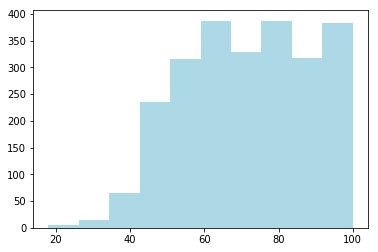

In [29]:
RT=df_f.rdd.map(lambda x:x[8]).collect()
plt.hist(RT,color='lightblue')
plt.show()

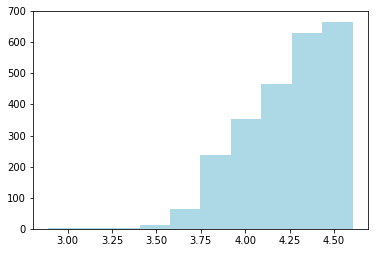

In [30]:
import numpy as np
RT1=np.log(RT)
plt.hist(RT1,color='lightblue')
plt.show()

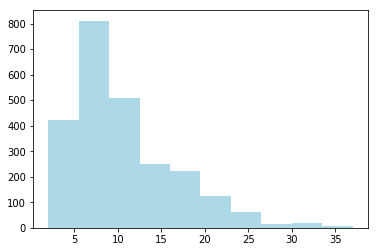

In [31]:
W9=df_f.rdd.map(lambda x:x[6]).collect()
plt.hist(W9,color='lightblue')
plt.show()

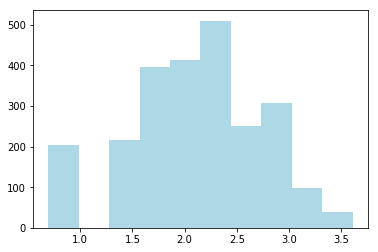

In [32]:
W91=np.log(W9)
plt.hist(W91,color='lightblue')
plt.show()

In [33]:

Rtt=df_f.rdd.map(lambda x:x[11]).collect()

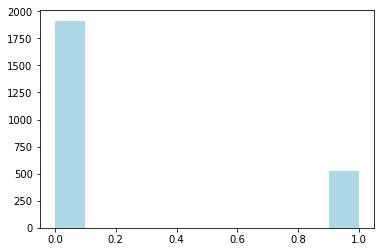

In [34]:
plt.hist(Rtt,color='lightblue')
plt.show()

In [35]:
df_f.columns

['MinTemp',
 'Rainfall',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'RainToday',
 'RainTomorrow',
 'Mgs01',
 'RF01']

In [36]:
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler


In [37]:

from pyspark.ml.feature import StringIndexer
indexerD = StringIndexer(inputCol="WindGustDir", outputCol="Index1")
df_f1=indexerD.fit(df_f).transform(df_f)
indexerD9 = StringIndexer(inputCol="WindDir9am", outputCol="Index2")
df_f2=indexerD9.fit(df_f1).transform(df_f1)
indexerD3 = StringIndexer(inputCol="WindDir3pm", outputCol="Index3")
df_f3=indexerD3.fit(df_f2).transform(df_f2)
indexerRT = StringIndexer(inputCol="RainToday", outputCol="Index4")
df_f4=indexerRT.fit(df_f3).transform(df_f3)



In [38]:
assembler = VectorAssembler(
  inputCols=['MinTemp',
             'Rainfall',
             'WindGustSpeed',
             'WindSpeed9am',
             'WindSpeed3pm',
             'Humidity9am',
             'Humidity3pm',
             'Mgs01',
             'RF01',
             'Index1',
             'Index2',
             'Index3',
             'Index4'],
              outputCol="features")


In [39]:
output = assembler.transform(df_f4)

In [40]:
df_fit=output.select("features","RainTomorrow")

In [41]:
df_fit.show()

+--------------------+------------+
|            features|RainTomorrow|
+--------------------+------------+
|[12.6,4.0,50.0,20...|           1|
|[2.7,33.4,31.0,6....|           0|
|[16.4,0.0,46.0,9....|           0|
|[0.9,0.2,15.0,7.0...|           0|
|[11.4,0.6,30.0,15...|           1|
|[5.2,0.0,28.0,6.0...|           0|
|(13,[0,2,3,4,5,6,...|           0|
|[14.3,0.0,50.0,20...|           0|
|[9.3,0.0,52.0,30....|           1|
|[5.0,1.4,52.0,9.0...|           0|
|[9.0,0.2,63.0,13....|           1|
|[8.2,0.0,39.0,6.0...|           0|
|[5.4,0.0,39.0,11....|           0|
|[15.4,0.4,30.0,11...|           1|
|[10.4,0.0,48.0,30...|           0|
|[5.8,17.2,69.0,31...|           1|
|[10.1,0.0,67.0,30...|           0|
|[11.9,0.0,20.0,4....|           0|
|[18.7,0.0,31.0,19...|           1|
|[13.2,0.0,35.0,11...|           0|
+--------------------+------------+
only showing top 20 rows



In [42]:
train_data,test_data = df_fit.randomSplit([0.8,0.2],seed="822")

In [43]:
from pyspark.ml.classification import DecisionTreeClassifier,GBTClassifier,RandomForestClassifier
from pyspark.ml import Pipeline

In [44]:
# Use defaults to make the comparison "fair". This simplifies the comparison process.

dtc = DecisionTreeClassifier(maxDepth=8,labelCol='RainTomorrow',featuresCol='features', impurity="gini")
#rfc = RandomForestClassifier(labelCol='RainTomorrow',featuresCol='features')
#gbt = GBTClassifier(labelCol='RainTomorrow',featuresCol='features')

In [45]:
# Train the models (it's three models, so it might take some time).
dtc_model = dtc.fit(train_data)
#rfc_model = rfc.fit(train_data)
#gbt_model = gbt.fit(train_data)

In [46]:
dtc_predictions = dtc_model.transform(test_data)
#rfc_predictions = rfc_model.transform(test_data)
#gbt_predictions = gbt_model.transform(test_data)

In [47]:
# Let's start off with binary classification.
from pyspark.ml.evaluation import BinaryClassificationEvaluator

# Note that the label column isn't named label, it's named PrivateIndex in this case.
my_binary_eval = BinaryClassificationEvaluator(labelCol = 'RainTomorrow')

# This is the area under the curve. This indicates that the data is highly seperable.
print("DTC")
print(my_binary_eval.evaluate(dtc_predictions))

# RFC improves accuracy but also model complexity. RFC outperforms DTC in nearly every situation.
#print("RFC")
#print(my_binary_eval.evaluate(rfc_predictions))

# We can't repeat these exact steps for GBT. If you print the schema of all three, you may be able to notice why.
# Instead, let's redefine the object:
#my_binary_gbt_eval = BinaryClassificationEvaluator(labelCol='RainTomorrow', rawPredictionCol='prediction')
#print("GBT")
#print(my_binary_gbt_eval.evaluate(gbt_predictions))

DTC
0.6840277777777778


In [48]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
acc_evaluator = MulticlassClassificationEvaluator(labelCol="RainTomorrow", predictionCol="prediction", metricName="accuracy")

In [49]:
dtc_acc = acc_evaluator.evaluate(dtc_predictions)
#rfc_acc = acc_evaluator.evaluate(rfc_predictions)
#gbt_acc = acc_evaluator.evaluate(gbt_predictions)

#print("Here are the results!")
#print('-'*40)
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc*100))
print('-'*40)
#print('A random forest ensemble has an accuracy of: {0:2.2f}%'.format(rfc_acc*100))
#print('-'*40)
#print('An ensemble using GBT has an accuracy of: {0:2.2f}%'.format(gbt_acc*100))

A single decision tree has an accuracy of: 88.25%
----------------------------------------


In [50]:
print(dtc_model)

dtc_predictions.select(["RainTomorrow","prediction"]).show()

DecisionTreeClassificationModel (uid=DecisionTreeClassifier_4173b657a3b1e64d43ad) of depth 8 with 177 nodes
+------------+----------+
|RainTomorrow|prediction|
+------------+----------+
|           0|       0.0|
|           0|       0.0|
|           0|       1.0|
|           0|       0.0|
|           0|       0.0|
|           1|       1.0|
|           1|       1.0|
|           0|       0.0|
|           0|       0.0|
|           0|       0.0|
|           1|       1.0|
|           0|       0.0|
|           0|       0.0|
|           0|       0.0|
|           0|       0.0|
|           0|       0.0|
|           0|       0.0|
|           1|       1.0|
|           0|       0.0|
|           0|       0.0|
+------------+----------+
only showing top 20 rows



In [51]:
TP = dtc_predictions.filter(dtc_predictions['prediction'] == 1).filter(dtc_predictions['RainTomorrow'] == 1).count()
FN = dtc_predictions.filter(dtc_predictions['prediction'] == 0).filter(dtc_predictions['RainTomorrow'] == 1).count()
TN = dtc_predictions.filter(dtc_predictions['prediction'] == 0).filter(dtc_predictions['RainTomorrow'] == 0).count()
FP = dtc_predictions.filter(dtc_predictions['prediction'] == 1).filter(dtc_predictions['RainTomorrow'] == 0).count()

In [52]:
conf_mat = sc.parallelize([
    {"Positive": TP, "Negative": FP,"Matrix":"Positive"},
    {"Positive": FN, "Negative": TN,"Matrix":"Negative"}
]).toDF()

/home/ubuntu/spark-2.1.1-bin-hadoop2.7/python/pyspark/sql/session.py:340: UserWarning: Using RDD of dict to inferSchema is deprecated. Use pyspark.sql.Row instead
  warnings.warn("Using RDD of dict to inferSchema is deprecated. "


In [53]:
conf_mat.show()

+--------+--------+--------+
|  Matrix|Negative|Positive|
+--------+--------+--------+
|Positive|      20|      61|
|Negative|     352|      35|
+--------+--------+--------+



In [54]:
dtc2 = DecisionTreeClassifier(maxDepth=5, labelCol="RainTomorrow" , featuresCol="features", impurity="gini")
dtc_model2 = dtc2.fit(train_data)
dtc_predictions2 = dtc_model2.transform(test_data)

dtc_acc2 = acc_evaluator.evaluate(dtc_predictions2)


In [55]:
print('A single decision tree has an accuracy of: {0:2.2f}%'.format(dtc_acc2*100))
print('-'*40)
print(dtc_acc2,dtc_model2)
print(dtc_acc,dtc_model)

A single decision tree has an accuracy of: 87.82%
----------------------------------------
0.8782051282051282 DecisionTreeClassificationModel (uid=DecisionTreeClassifier_4dc8a7ce35b2d018e6f7) of depth 5 with 47 nodes
0.8824786324786325 DecisionTreeClassificationModel (uid=DecisionTreeClassifier_4173b657a3b1e64d43ad) of depth 8 with 177 nodes


ImportError: cannot import name 'CurveMetrics'